# Rubin and Roman Filter Transmissions

Data from https://svo2.cab.inta-csic.es/theory/fps/index.php
and https://github.com/romanSpaceTelescope/roman-technical-information
and https://github.com/lsst/throughputs

In [5]:
from matplotlib import pyplot as plt 
import numpy as np
from os import path
from astropy.table import Table
from astropy.io import ascii

Load the data files with filter transmission data for the Rubin and Roman filters

In [34]:
data_dir = './data/'

# Note these are the filter transmission curves, without factoring in QE or optics transmission
rubin_filter_only = False
if rubin_filter_only:
    rubin_files = {
        'u': 'LSST_u_filter.dat',
        'g': 'LSST_g_filter.dat',
        'r': 'LSST_r_filter.dat',
        'i': 'LSST_i_filter.dat',
        'z': 'LSST_z_filter.dat',
        'y': 'LSST_y_filter.dat'
    }
else:
    rubin_files = {
        'u': 'LSST_u.dat',
        'g': 'LSST_g.dat',
        'r': 'LSST_r.dat',
        'i': 'LSST_i.dat',
        'z': 'LSST_z.dat',
        'y': 'LSST_y.dat'
    }

roman_files = {
    'F062': 'Roman_WFI_F062.dat',
    'F087': 'Roman_WFI_F087.dat',
    'F106': 'Roman_WFI_F106.dat',
    'F129': 'Roman_WFI_F129.dat',
    'F146': 'Roman_WFI_F146.dat',
    'F158': 'Roman_WFI_F158.dat',
    'F184': 'Roman_WFI_F184.dat',
    'F213': 'Roman_WFI_F213.dat',
    'P127': 'Roman_WFI_Prism.dat',
    'G150': 'Roman_WFI_Grism.dat'
}

In [43]:
rubin_data = {}
for f, file_name in rubin_files.items():
    rubin_data[f] = ascii.read(path.join(data_dir, file_name))

roman_data = {}
for f, file_name in roman_files.items():
    roman_data[f] = ascii.read(path.join(data_dir, file_name))

Plotting configuration

In [80]:
PLOT_COLORS = {
    "F062": "#5f038c",
    "F087": "#3303ab",
    "F106": "#0344a6",
    "F129": "#04b8ac",
    "F158": "#058c01",
    "F184": "#ab6902",
    "F213": "#7a0701",
    "F146": "#7d039c",
    "G150": "#080f17",
    "P127": "#333033",
    "u": "#6000ac",
    "g": "#0070ac",
    "r": "#e7d200",
    "i": "#e79a00",
    "z": "#9c1e02",
    "y": "#5d0018"
  }

LINE_STYLES = {
    "F062": "--",
    "F087": "--",
    "F106": "--",
    "F129": "--",
    "F158": "--",
    "F184": "--",
    "F213": "--",
    "F146": "--",
    "G150": "-.",
    "P127": ":",
    "u": "-",
    "g": "-",
    "r": "-",
    "i": "-",
    "z": "-",
    "y": "-"
  }

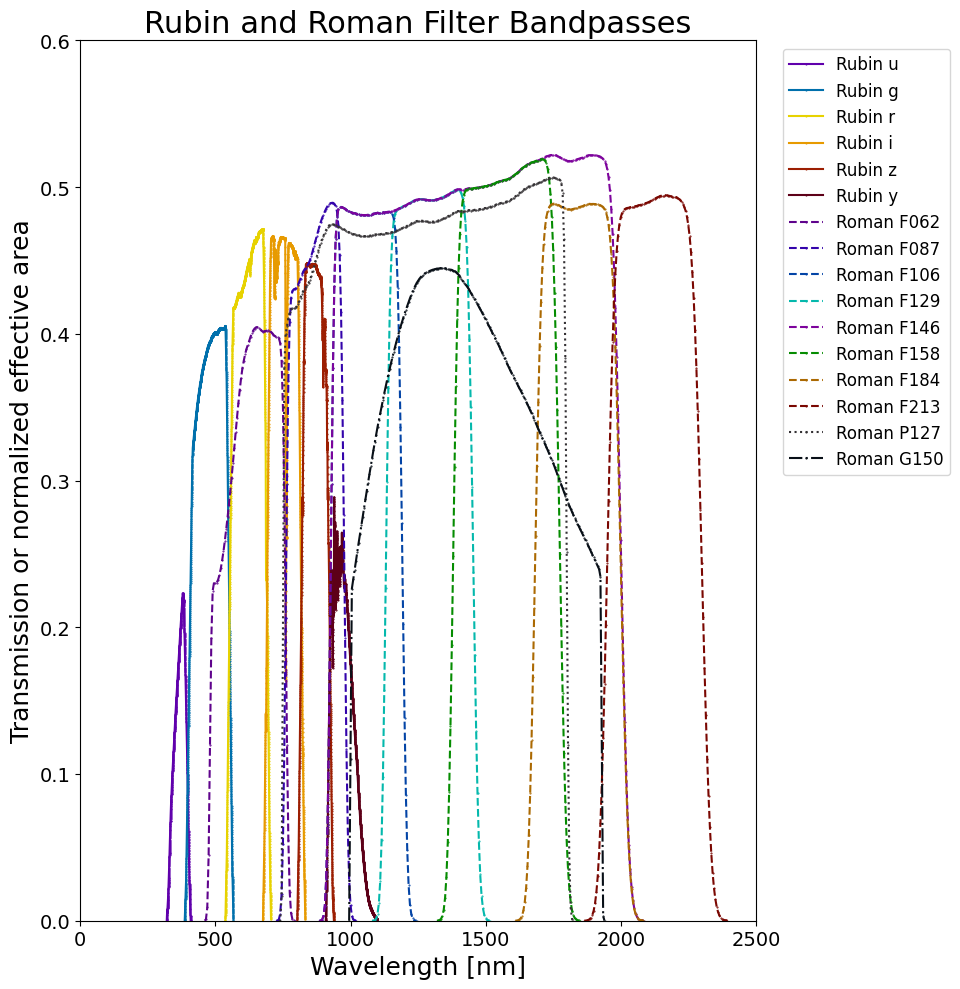

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Plot Rubin transmission curves
for f, data, in rubin_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nm
    ax.plot(xplot, data['col2'], c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Rubin '+f)

# Plot Roman filter transmission curves
# The Roman data are in units of effective telescope area in m2, so we normalize by the 
# maximum Roman collecting area 
roman_area = 2.4**2
for f, data, in roman_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nm
    yplot = data['col2'] / roman_area
    ax.plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Roman '+f)

ymin, ymax = ax.get_ylim() 
ax.set_ylim([0.0, ymax])

xticks = ax.get_xticks() 
xticklabels = ax.get_xticklabels()
ax.set_xticks(xticks, xticklabels, fontsize=14)
yticks = ax.get_yticks() 
yticklabels = axs[1].get_yticklabels()
ax.set_yticks(yticks, yticklabels, fontsize=14)

ax.set_xlabel('Wavelength [nm]', fontsize=18) 
ax.set_ylabel('Transmission or normalized effective area', fontsize=18)
ax.set_title('Rubin and Roman Filter Bandpasses', fontsize=22)

plt.legend(bbox_to_anchor=(1.3, 1.0), fontsize=12)
plt.tight_layout()
plt.savefig('./rubin_roman_filter_transmission_curves1.png')

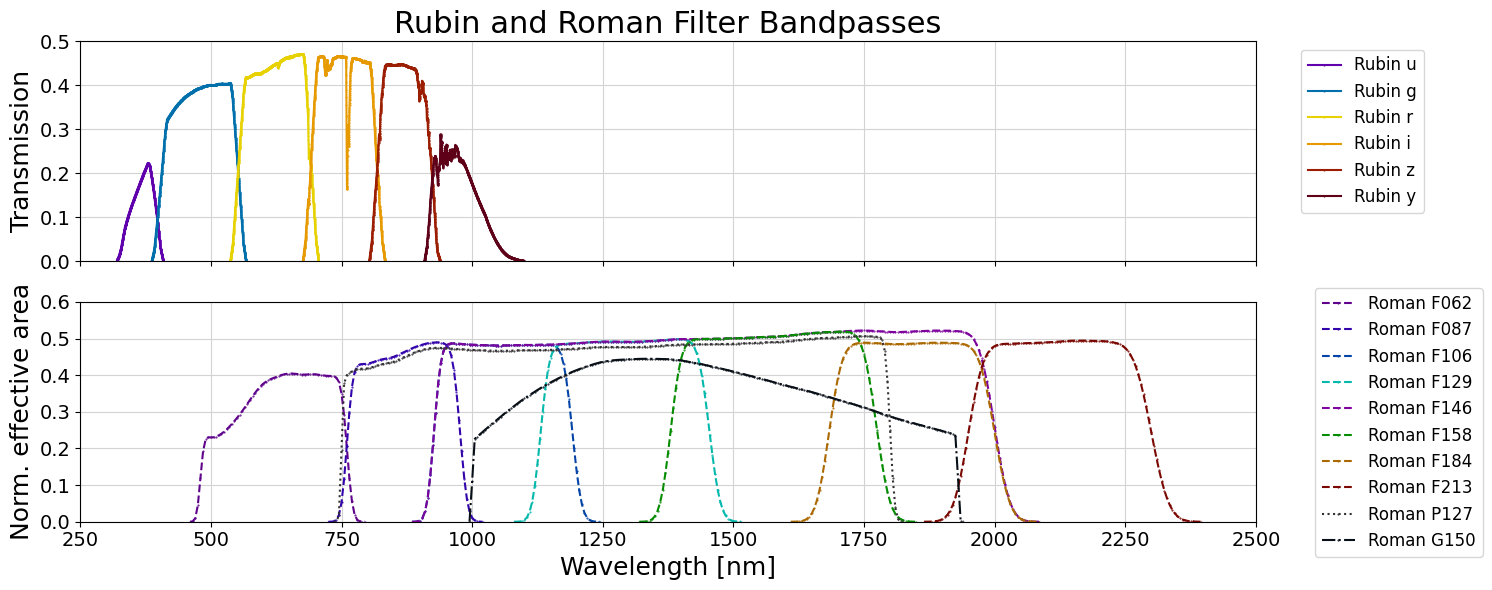

In [100]:
fig, axs = plt.subplots(2, 1, figsize=(15,6))
plt.subplots_adjust(hspace=0.05)

# Plot Rubin transmission curves
for f, data, in rubin_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nm
    axs[0].plot(xplot, data['col2'], c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Rubin '+f)

# Plot Roman filter transmission curves
# The Roman data are in units of effective telescope area in m2, so we normalize by the 
# maximum Roman collecting area 
roman_area = 2.4**2
for f, data, in roman_data.items():
    xplot = data['col1'] / 10.0 # Convert Angstroms to nm
    yplot = data['col2'] / roman_area
    axs[1].plot(xplot, yplot, c=PLOT_COLORS[f], marker='.', markersize=1, ls=LINE_STYLES[f], label='Roman '+f)

ymin, ymax = axs[0].get_ylim() 
axs[0].set_ylim([0.0, ymax])
ymin, ymax = axs[1].get_ylim() 
axs[1].set_ylim([0.0, ymax])

yticks = axs[0].get_yticks() 
yticklabels = axs[0].get_yticklabels()
axs[0].set_yticks(yticks, yticklabels, fontsize=14)
axs[0].set_xticklabels([])

xticks = axs[1].get_xticks() 
xticklabels = axs[1].get_xticklabels()
axs[1].set_xticks(xticks, xticklabels, fontsize=14)
yticks = axs[1].get_yticks() 
yticklabels = axs[1].get_yticklabels()
axs[1].set_yticks(yticks, yticklabels, fontsize=14)

xmin1, xmax1 = axs[0].get_xlim()
xmin2, xmax2 = axs[1].get_xlim()
xmin = min(xmin1, xmin2)
xmax = max(xmax1, xmax2)
axs[0].set_xlim([xmin, xmax])
axs[1].set_xlim([xmin, xmax])

axs[0].set_ylabel('Transmission', fontsize=18)
axs[0].set_title('Rubin and Roman Filter Bandpasses', fontsize=22)

axs[1].set_ylabel('Norm. effective area', fontsize=18)
axs[1].set_xlabel('Wavelength [nm]', fontsize=18)

axs[0].legend(bbox_to_anchor=(1.15, 1.0), fontsize=12)
axs[1].legend(bbox_to_anchor=(1.2, 1.1), fontsize=12)

axs[0].grid(c='lightgrey')
axs[1].grid(c='lightgrey')

plt.tight_layout()
plt.savefig('./rubin_roman_filter_transmission_curves2.png')